In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os

In [3]:
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 训练集
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 验证集
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# ImageDataGenerator 图片生成器, 会自动的帮我们从指定目录中读取图片. 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # 文件夹路径
    target_size=(64, 64),  # 指定图片缩放之后的大小
    batch_size=20,
    # 默认是categorical,表示多分类, 二分类用binary
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
    validation_dir, # 文件夹路径
    target_size=(64, 64),  # 指定图片缩放之后的大小
    batch_size=20,
    # 默认是categorical,表示多分类, 二分类用binary
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
# 搭建卷积神经网络
model = tf.keras.models.Sequential()
# 2次卷积一次池化, 3层, 2层全连接. 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu',
                                 input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)      

In [33]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['acc'])

In [34]:
history = model.fit(train_generator, 
                    steps_per_epoch=100, # 2000 images : = batch_size * steps
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50, # 1000 images = batch_size * steps
                   )

Epoch 1/20
100/100 [==============================] - 4s 30ms/step - loss: 0.6933 - acc: 0.5003 - val_loss: 0.6881 - val_acc: 0.5060
Epoch 2/20
100/100 [==============================] - 3s 28ms/step - loss: 0.6768 - acc: 0.5654 - val_loss: 0.6393 - val_acc: 0.6350
Epoch 3/20
100/100 [==============================] - 3s 27ms/step - loss: 0.6194 - acc: 0.6684 - val_loss: 0.6204 - val_acc: 0.6710
Epoch 4/20
100/100 [==============================] - 3s 28ms/step - loss: 0.5548 - acc: 0.7294 - val_loss: 0.6026 - val_acc: 0.6830
Epoch 5/20
100/100 [==============================] - 3s 27ms/step - loss: 0.5452 - acc: 0.7311 - val_loss: 0.5963 - val_acc: 0.6780
Epoch 6/20
100/100 [==============================] - 3s 27ms/step - loss: 0.5030 - acc: 0.7309 - val_loss: 0.5598 - val_acc: 0.7350
Epoch 7/20
100/100 [==============================] - 3s 28ms/step - loss: 0.4529 - acc: 0.7920 - val_loss: 0.5633 - val_acc: 0.7250
Epoch 8/20
100/100 [==============================] - 3s 27ms/step - 

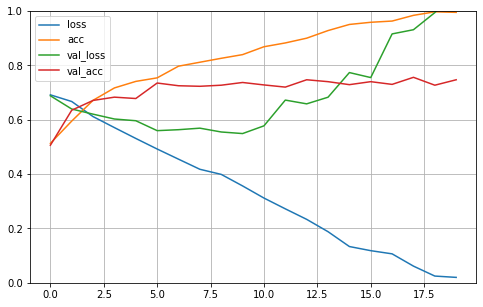

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
# 数据增强
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40, 
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, # 文件夹路径
    target_size=(64, 64),  # 指定图片缩放之后的大小
    batch_size=20,
    # 默认是categorical,表示多分类, 二分类用binary
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
    validation_dir, # 文件夹路径
    target_size=(64, 64),  # 指定图片缩放之后的大小
    batch_size=20,
    # 默认是categorical,表示多分类, 二分类用binary
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
# 搭建卷积神经网络
model = tf.keras.models.Sequential()
# 2次卷积一次池化, 3层, 2层全连接. 
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu',
                                 input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['acc'])

history = model.fit(train_generator, 
                    steps_per_epoch=100, # 2000 images : = batch_size * steps
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50, # 1000 images = batch_size * steps
                   )

Epoch 1/20
100/100 [==============================] - 5s 47ms/step - loss: 0.6934 - acc: 0.4989 - val_loss: 0.6905 - val_acc: 0.5040
Epoch 2/20
100/100 [==============================] - 5s 47ms/step - loss: 0.6930 - acc: 0.5108 - val_loss: 0.6845 - val_acc: 0.5280
Epoch 3/20
100/100 [==============================] - 4s 44ms/step - loss: 0.6867 - acc: 0.5560 - val_loss: 0.6446 - val_acc: 0.6200
Epoch 4/20
100/100 [==============================] - 4s 45ms/step - loss: 0.6524 - acc: 0.6232 - val_loss: 0.6780 - val_acc: 0.5750
Epoch 5/20
100/100 [==============================] - 4s 44ms/step - loss: 0.6736 - acc: 0.5856 - val_loss: 0.6043 - val_acc: 0.6770
Epoch 6/20
100/100 [==============================] - 4s 44ms/step - loss: 0.6133 - acc: 0.6503 - val_loss: 0.5926 - val_acc: 0.6860
Epoch 7/20
100/100 [==============================] - 4s 44ms/step - loss: 0.6189 - acc: 0.6653 - val_loss: 0.6047 - val_acc: 0.6670
Epoch 8/20
100/100 [==============================] - 5s 46ms/step - 

In [38]:
history = model.fit(train_generator, 
                    steps_per_epoch=100, # 2000 images : = batch_size * steps
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50, # 1000 images = batch_size * steps
                   )

Epoch 1/20
100/100 [==============================] - 5s 47ms/step - loss: 0.5291 - acc: 0.7345 - val_loss: 0.5312 - val_acc: 0.7310
Epoch 2/20
100/100 [==============================] - 5s 45ms/step - loss: 0.5126 - acc: 0.7400 - val_loss: 0.5147 - val_acc: 0.7490
Epoch 3/20
100/100 [==============================] - 4s 45ms/step - loss: 0.5192 - acc: 0.7385 - val_loss: 0.4972 - val_acc: 0.7420
Epoch 4/20
100/100 [==============================] - 5s 45ms/step - loss: 0.5124 - acc: 0.7465 - val_loss: 0.5264 - val_acc: 0.7170
Epoch 5/20
100/100 [==============================] - 4s 45ms/step - loss: 0.5141 - acc: 0.7485 - val_loss: 0.4969 - val_acc: 0.7450
Epoch 6/20
100/100 [==============================] - 5s 46ms/step - loss: 0.5048 - acc: 0.7400 - val_loss: 0.5044 - val_acc: 0.7460
Epoch 7/20
100/100 [==============================] - 5s 46ms/step - loss: 0.4905 - acc: 0.7610 - val_loss: 0.5057 - val_acc: 0.7400
Epoch 8/20
100/100 [==============================] - 5s 45ms/step - 